# Código para la Predicción de Valores de Temperatura para AWOU5IMX

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("sensor_data.csv")
df = df[df["Machine_ID"] == "AWOU5IMX"]
df = df.set_index('Date_Time')[['Engine_Temperature']]
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,Engine_Temperature
Date_Time,
2019-06-16 01:24:00,46.847351
2019-06-16 01:39:00,46.834448
2019-06-16 01:54:00,46.775533
2019-06-16 02:09:00,46.615212
2019-06-16 02:24:00,46.614892


<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

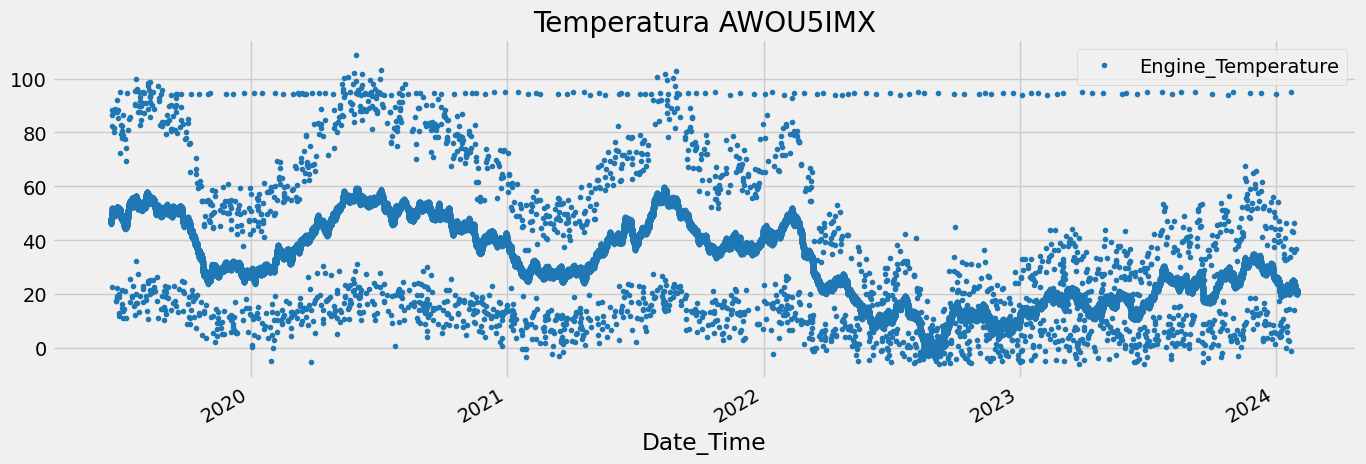

In [4]:
df.plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX')

In [5]:
# Suavizado con media móvil (por ejemplo, ventana de 7 días)
df['Smoothed_Temperature'] = df['Engine_Temperature'].rolling(window=7, min_periods=1).mean()

<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

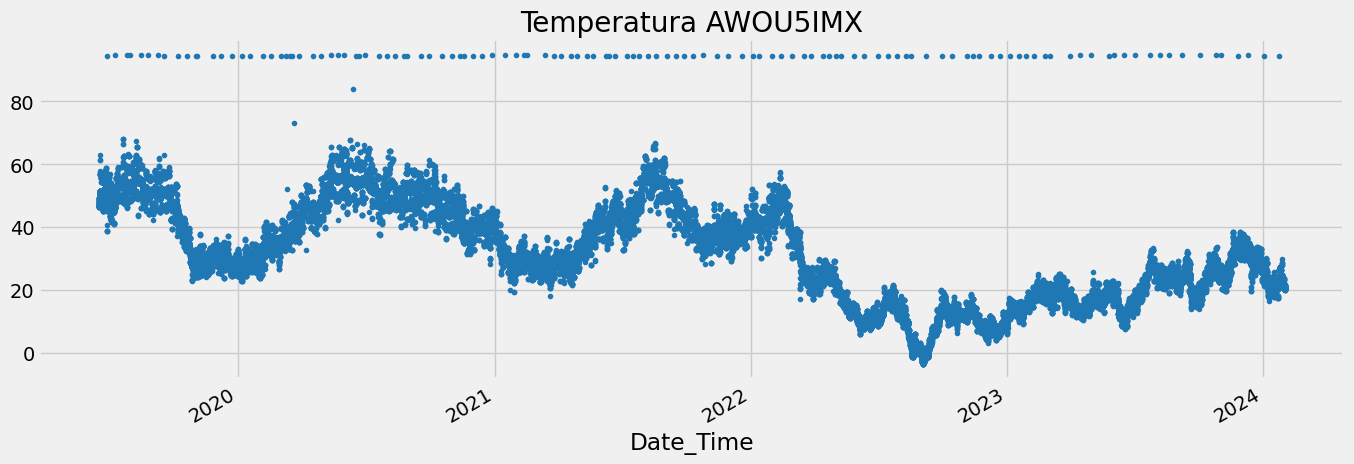

In [6]:
df['Smoothed_Temperature'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX')

In [12]:
df_filtrado = df[df['Smoothed_Temperature'] < 90]

In [13]:
df_filtrado.head()

,Engine_Temperature,Smoothed_Temperature
Date_Time,,
2019-06-16 01:24:00,46.847351,46.847351
2019-06-16 01:39:00,46.834448,46.840900
2019-06-16 01:54:00,46.775533,46.819111
2019-06-16 02:09:00,46.615212,46.768136
2019-06-16 02:24:00,46.614892,46.737487


<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

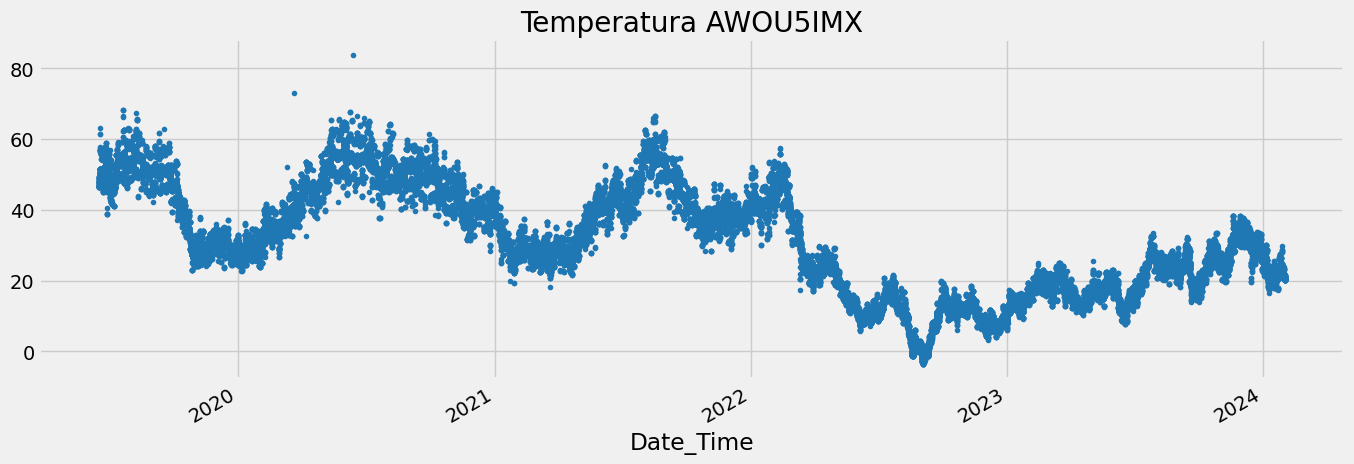

In [14]:
df_filtrado['Smoothed_Temperature'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX')

In [36]:
# Suavizado con media móvil (por ejemplo, ventana de 7 días)
df['Smoothed_Temperature_5'] = df['Engine_Temperature'].rolling(window=28, min_periods=1).mean()

In [29]:
df.head()

,Engine_Temperature,Smoothed_Temperature,Smoothed_Temperature_2,Smoothed_Temperature_3,Smoothed_Temperature_4
Date_Time,,,,,
2019-06-16 01:24:00,46.847351,46.847351,46.847351,46.847351,46.847351
2019-06-16 01:39:00,46.834448,46.840900,46.834448,46.840900,46.840900
2019-06-16 01:54:00,46.775533,46.819111,46.775533,46.819111,46.819111
2019-06-16 02:09:00,46.615212,46.768136,46.615212,46.768136,46.768136
2019-06-16 02:24:00,46.614892,46.737487,46.614892,46.737487,46.737487


<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

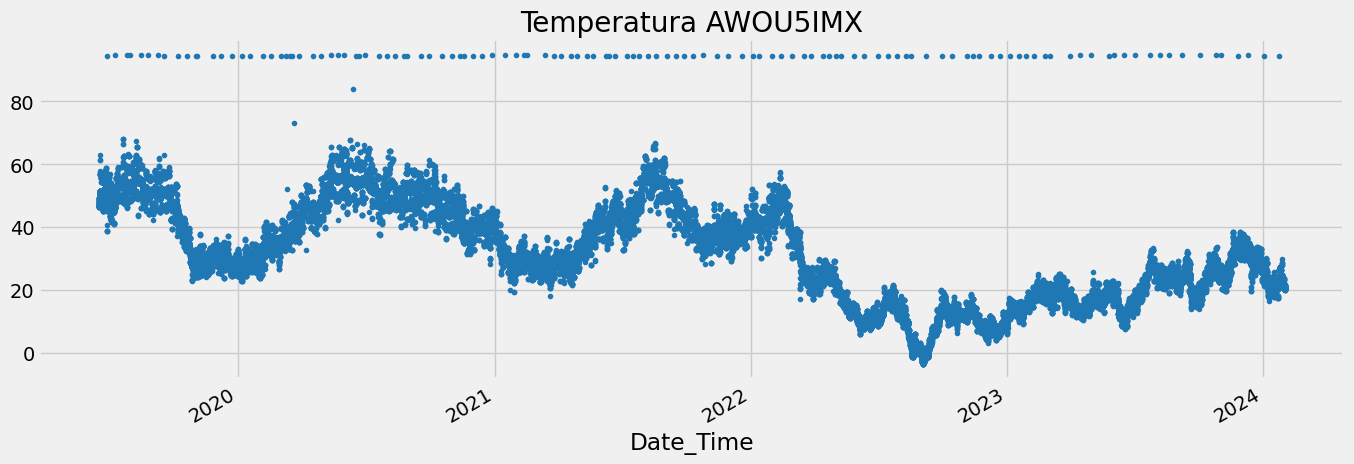

In [ ]:
df['Smoothed_Temperature'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX') #7dias

<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

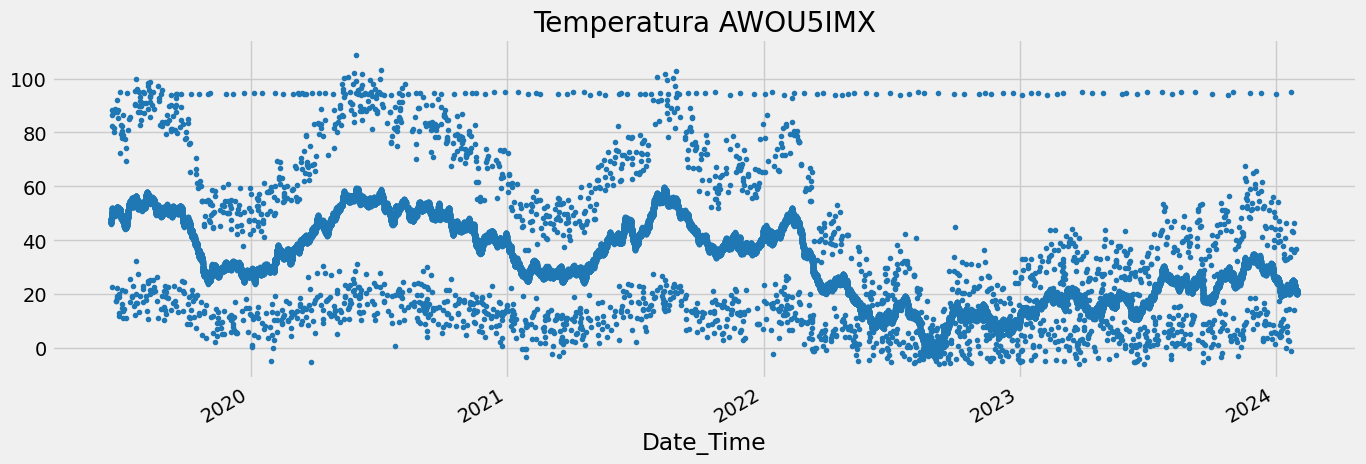

In [ ]:
df['Smoothed_Temperature_2'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX') #1dia

<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

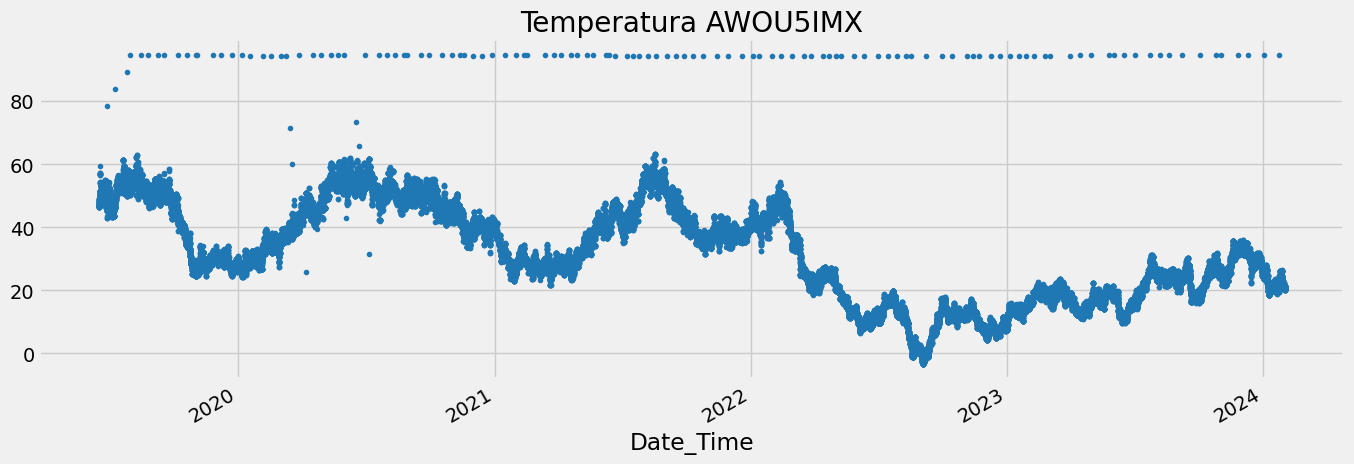

In [ ]:
df['Smoothed_Temperature_3'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX') #14dias

<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

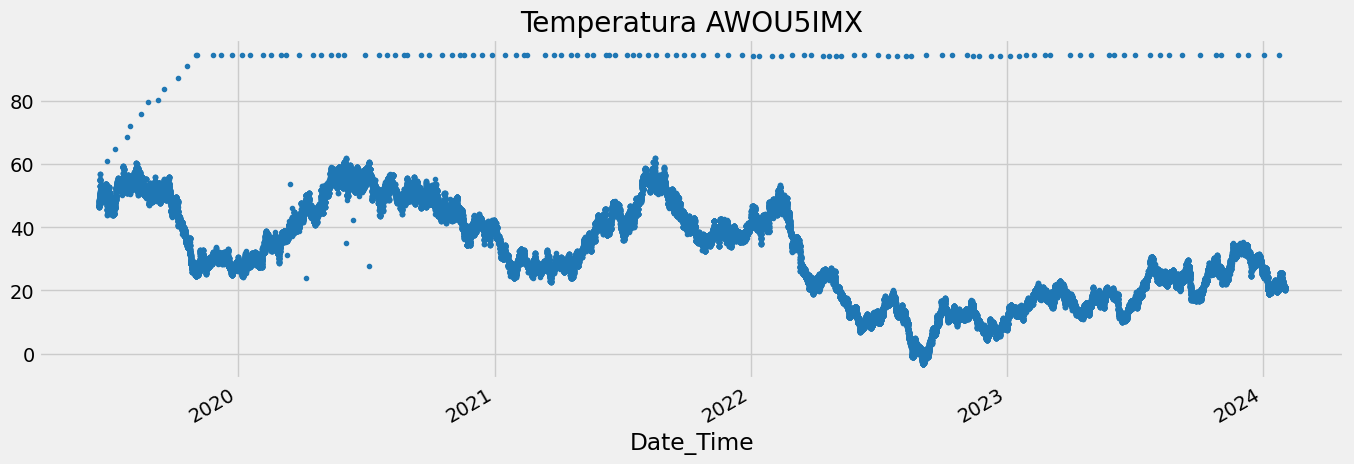

In [ ]:
df['Smoothed_Temperature_4'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX') #21dias

<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

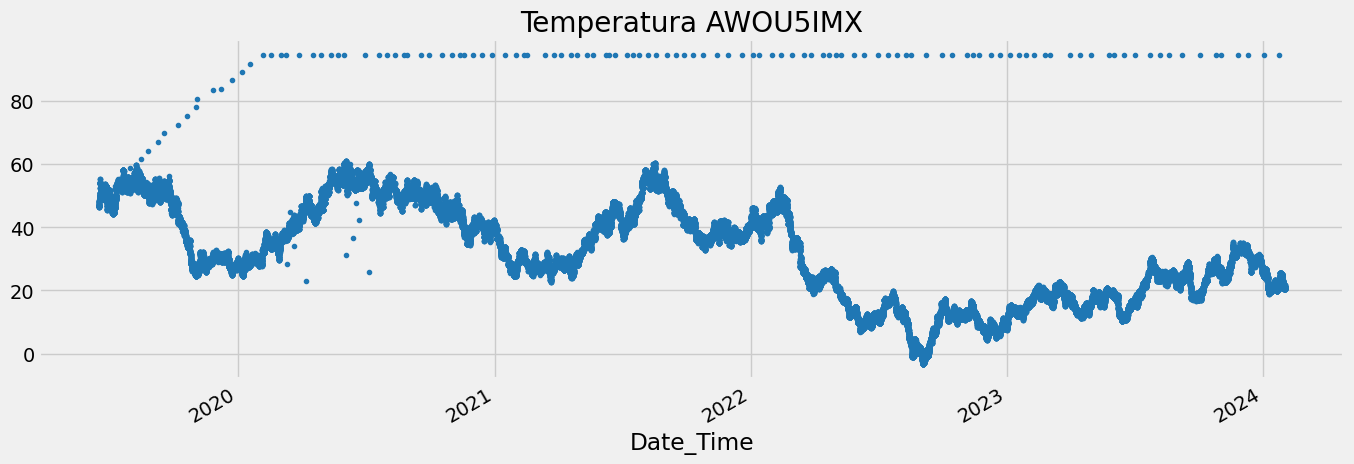

In [37]:
df['Smoothed_Temperature_5'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX') #21dias

In [23]:
dff2 = df[df['Smoothed_Temperature_2'] < 90]

In [38]:
dff3 = df[df['Smoothed_Temperature_5'] < 78]

<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

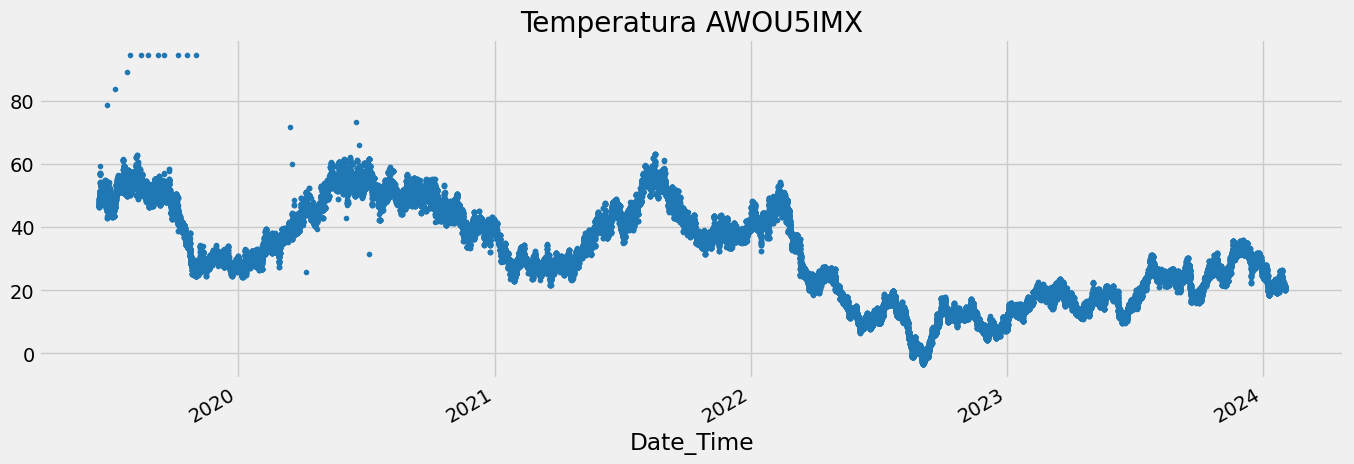

In [40]:
dff3['Smoothed_Temperature_3'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX') #21dias

# Train / Test Split

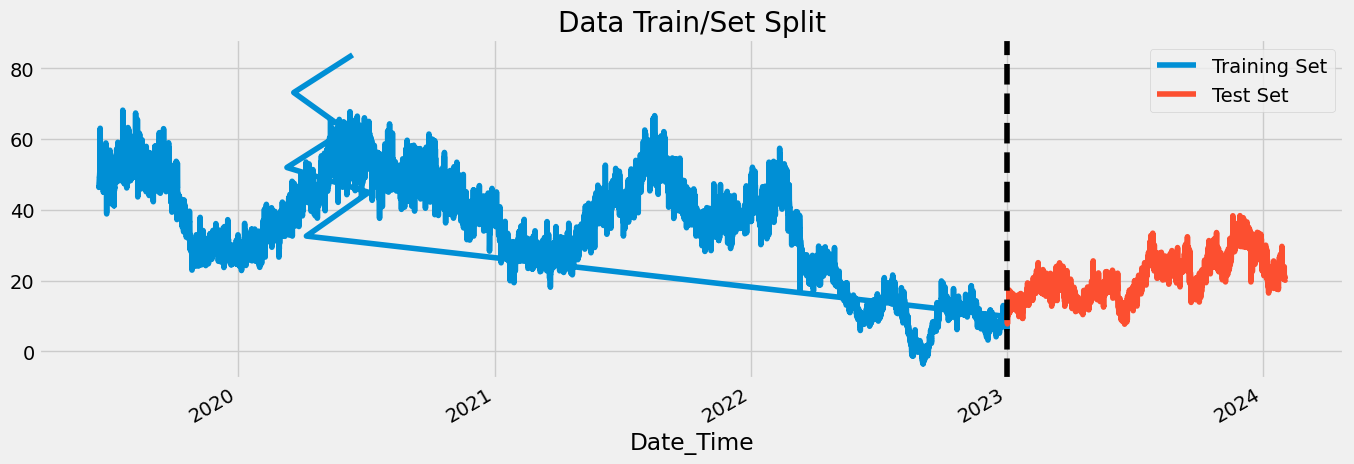

In [41]:
train = df_filtrado['Smoothed_Temperature'].loc[df_filtrado.index < '01-01-2023 00:00']
test = df_filtrado['Smoothed_Temperature'].loc[df_filtrado.index >= '01-01-2023 00:00']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Set Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2023 00:00', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## Que pasa en 1 semana

In [47]:
dfweek = df_filtrado.loc[(df_filtrado.index > '01-01-2023 00:00') & (df_filtrado.index < '01-07-2023 00:00')]

<Axes: title={'center': 'Temperatura semana AWOU5IMX'}, xlabel='Date_Time'>

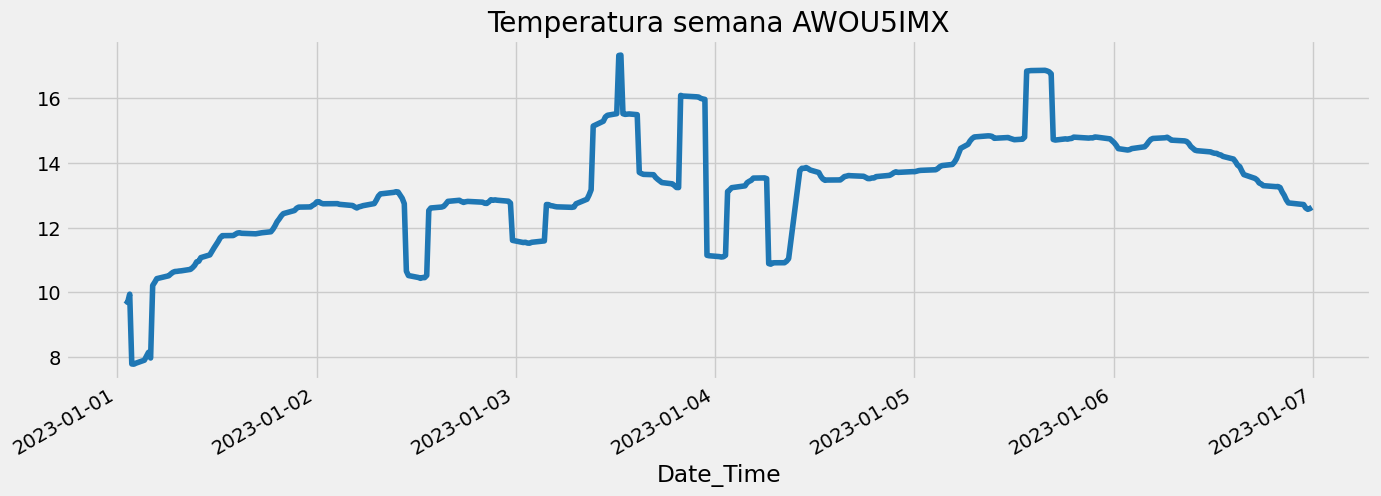

In [55]:
dfweek['Smoothed_Temperature'].plot(style='-', figsize=(15,5), color=color_pal[0], title='Temperatura semana AWOU5IMX') 

## Que pasa en 1 día

In [58]:
dfday = df_filtrado.loc[(df_filtrado.index > pd.to_datetime('01-04-2023 00:00')) & (df_filtrado.index < pd.to_datetime('01-04-2023 23:59'))]

<Axes: title={'center': 'Temperatura dia AWOU5IMX'}, xlabel='Date_Time'>

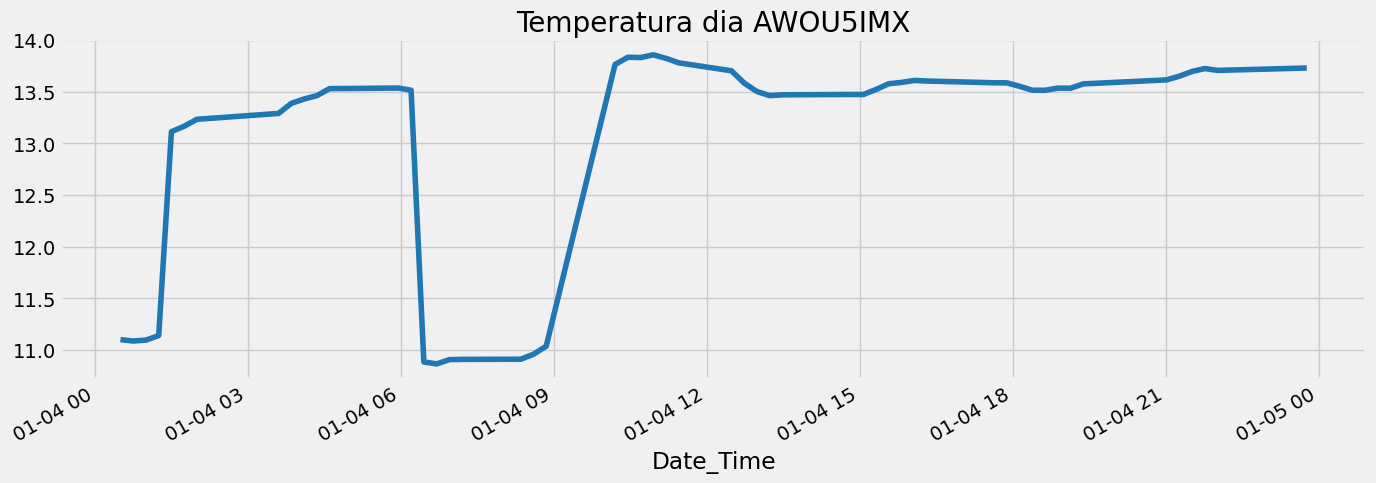

In [59]:
dfday['Smoothed_Temperature'].plot(style='-', figsize=(15,5), color=color_pal[0], title='Temperatura dia AWOU5IMX') #21dias

# Feature Creation

In [61]:
df_smooth = df_filtrado[['Smoothed_Temperature']].copy()

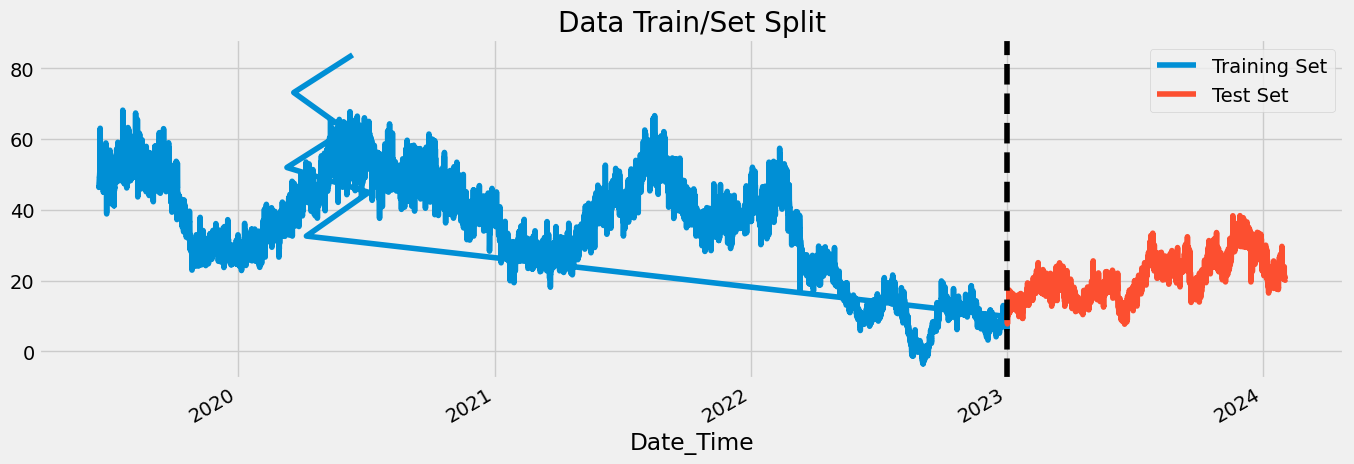

In [98]:
train_s = df_smooth.loc[df_smooth.index < '01-01-2023 00:00']
test_s = df_smooth.loc[df_smooth.index >= '01-01-2023 00:00']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Set Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2023 00:00', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [99]:
train_s.head()

,Smoothed_Temperature,hour,dayofweek,quarter,month,year,dayofyear
Date_Time,,,,,,,
2019-06-16 01:24:00,46.847351,1,6,2,6,2019,167
2019-06-16 01:39:00,46.840900,1,6,2,6,2019,167
2019-06-16 01:54:00,46.819111,1,6,2,6,2019,167
2019-06-16 02:09:00,46.768136,2,6,2,6,2019,167
2019-06-16 02:24:00,46.737487,2,6,2,6,2019,167


In [95]:
def create_features(df):
    """
    Create time series features, based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df_smooth = create_features(df_smooth)

In [96]:
df_smooth.head()

,Smoothed_Temperature,hour,dayofweek,quarter,month,year,dayofyear
Date_Time,,,,,,,
2019-06-16 01:24:00,46.847351,1,6,2,6,2019,167
2019-06-16 01:39:00,46.840900,1,6,2,6,2019,167
2019-06-16 01:54:00,46.819111,1,6,2,6,2019,167
2019-06-16 02:09:00,46.768136,2,6,2,6,2019,167
2019-06-16 02:24:00,46.737487,2,6,2,6,2019,167


## Visualización de Feature vs Target (Temperatura)

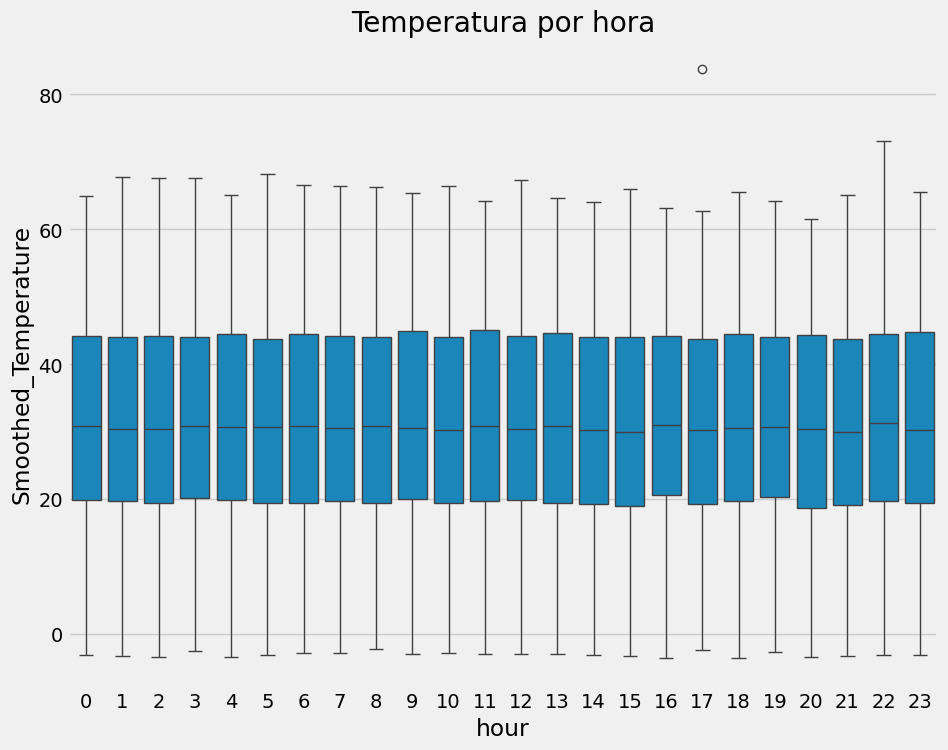

In [64]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_smooth, x='hour', y='Smoothed_Temperature')
ax.set_title('Temperatura por hora')
plt.show()

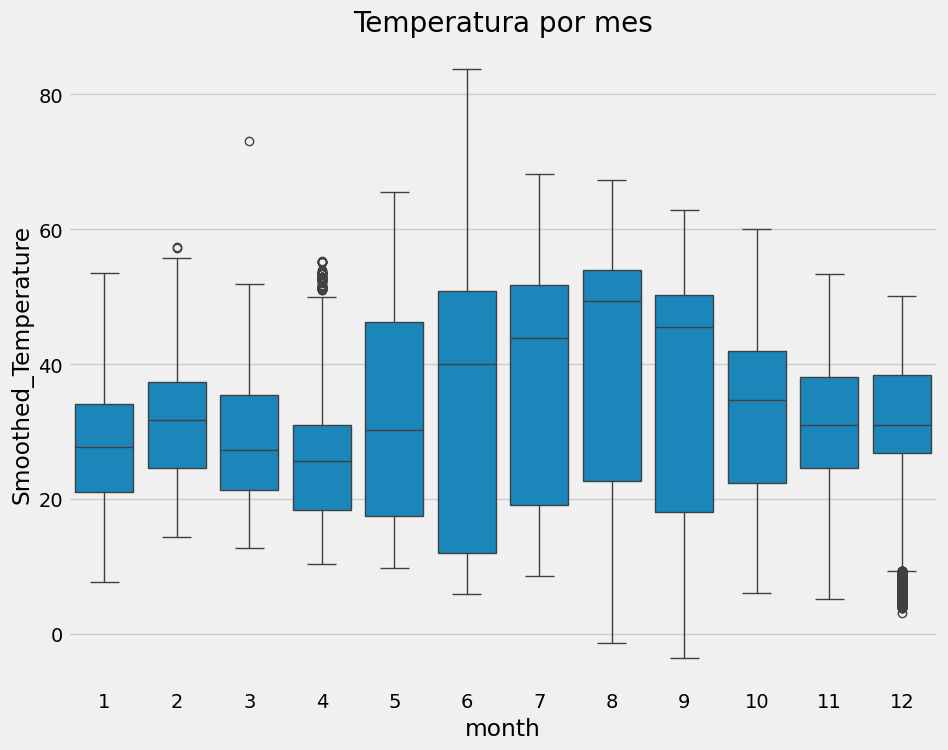

In [65]:
g, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_smooth, x='month', y='Smoothed_Temperature')
ax.set_title('Temperatura por mes')
plt.show()

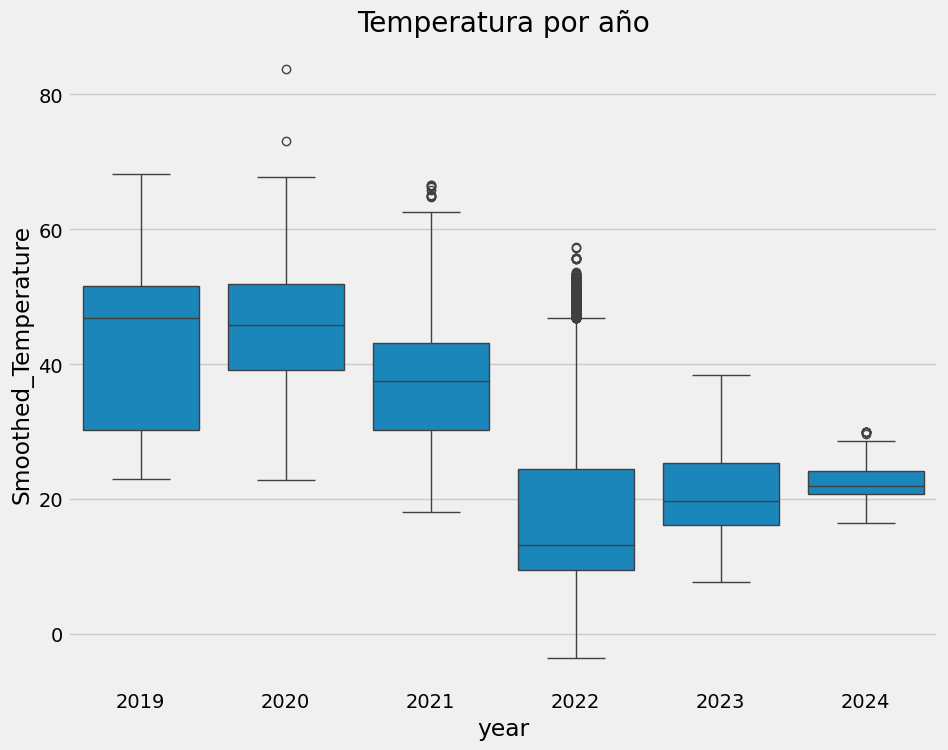

In [66]:
g, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_smooth, x='year', y='Smoothed_Temperature')
ax.set_title('Temperatura por año')
plt.show()

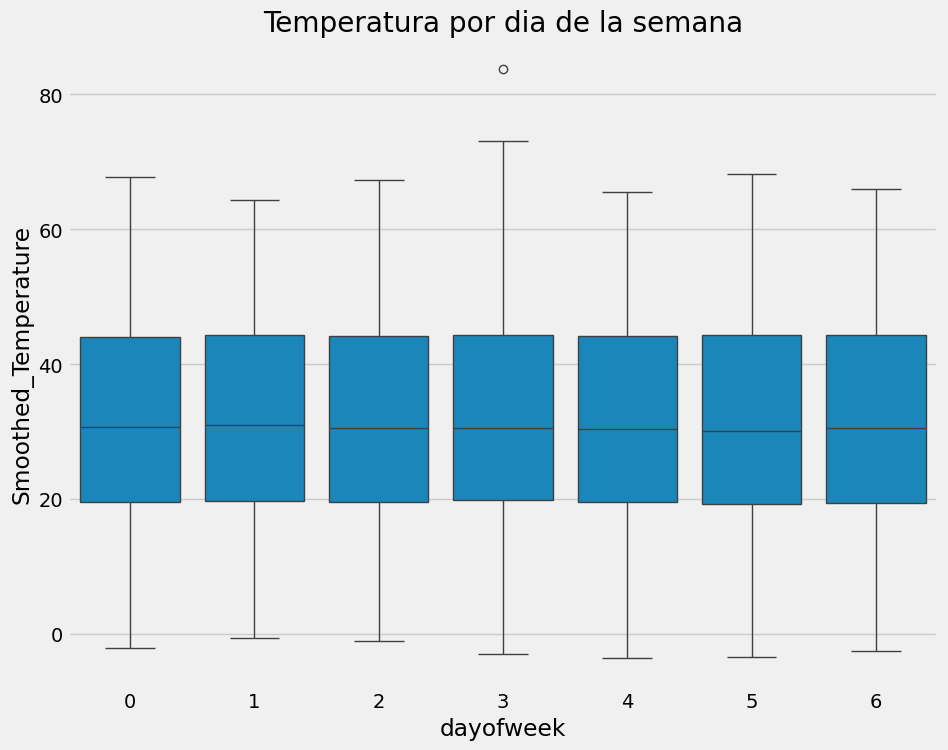

In [67]:
g, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_smooth, x='dayofweek', y='Smoothed_Temperature')
ax.set_title('Temperatura por dia de la semana')
plt.show()

# Create Model

In [100]:
train_s = create_features(train_s)
test_s = create_features(test_s)

In [101]:
train_s.head()

,Smoothed_Temperature,hour,dayofweek,quarter,month,year,dayofyear
Date_Time,,,,,,,
2019-06-16 01:24:00,46.847351,1,6,2,6,2019,167
2019-06-16 01:39:00,46.840900,1,6,2,6,2019,167
2019-06-16 01:54:00,46.819111,1,6,2,6,2019,167
2019-06-16 02:09:00,46.768136,2,6,2,6,2019,167
2019-06-16 02:24:00,46.737487,2,6,2,6,2019,167


In [102]:
df_smooth.columns

Index(['Smoothed_Temperature', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [103]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
TARGET = 'Smoothed_Temperature'

In [104]:
X_train = train_s[FEATURES]
y_train = train_s[TARGET]

X_test = test_s[FEATURES]
y_test = test_s[TARGET]

In [106]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:14.96222	validation_1-rmse:15.10543
[100]	validation_0-rmse:5.94538	validation_1-rmse:13.37010
[102]	validation_0-rmse:5.84661	validation_1-rmse:13.42142


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [108]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

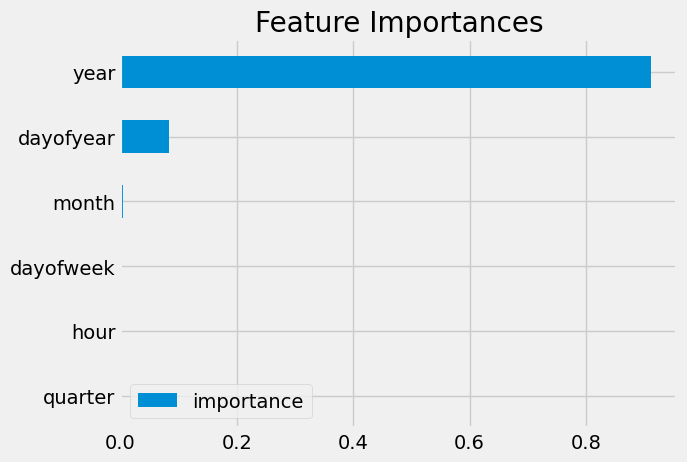

In [109]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importances')
plt.show()

# Pronóstico en Set de Prueba (Test)

In [110]:
test_s['predicction'] = reg.predict(X_test)

In [113]:
df_smooth = df_smooth.merge(test_s[['predicction']], how='left', left_index=True, right_index=True)

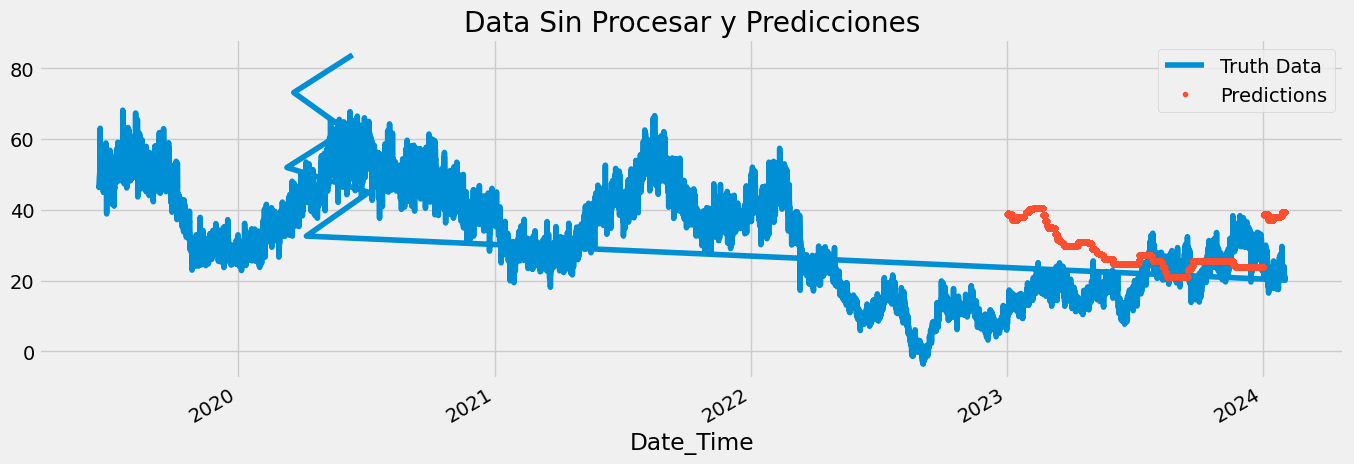

In [114]:
ax = df_smooth[['Smoothed_Temperature']].plot(figsize=(15, 5))
df_smooth['predicction'].plot(ax=ax, style=".")
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Data Sin Procesar y Predicciones')
plt.show()